In [137]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb

In [138]:
#importando dados

In [139]:
ativo = wb.get_data_yahoo('AUDJPY=X', start=2000)
ativo = ativo.drop(columns='Volume')
ativo = ativo.drop(columns='Adj Close')
ativo['MM10'] = ativo['Close'].rolling(10).mean()
ativo['MM20'] = ativo['Close'].rolling(20).mean()
ativo['MM100'] = ativo['Close'].rolling(100).mean()
ativo['MM200'] = ativo['Close'].rolling(200).mean()
ativo

,High,Low,Open,Close,MM10,MM20,MM100,MM200
Date,,,,,,,,
2003-12-01,79.739998,78.820000,79.338997,79.370003,NaN,NaN,NaN,NaN
2003-12-02,79.923111,79.272598,79.370003,79.610001,NaN,NaN,NaN,NaN
2003-12-03,79.812798,79.190002,79.589996,79.730003,NaN,NaN,NaN,NaN
2003-12-04,79.739998,79.110001,79.730003,79.570000,NaN,NaN,NaN,NaN
2003-12-05,79.650002,79.095200,79.589996,79.199997,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-01-13,80.677002,80.277000,80.660004,80.666000,79.844101,79.185551,76.731688,74.812789
2021-01-14,80.795258,80.400002,80.434998,80.427002,79.958301,79.290551,76.769238,74.875459
2021-01-15,80.783997,79.734001,80.734001,80.699997,80.190501,79.398550,76.801098,74.935334


In [140]:
mais_recente = ativo.iloc[[-2]]
mais_recente

,High,Low,Open,Close,MM10,MM20,MM100,MM200
Date,,,,,,,,
2021-01-18,79.892998,79.510002,79.848,79.882004,80.218001,79.468201,76.822218,74.991649


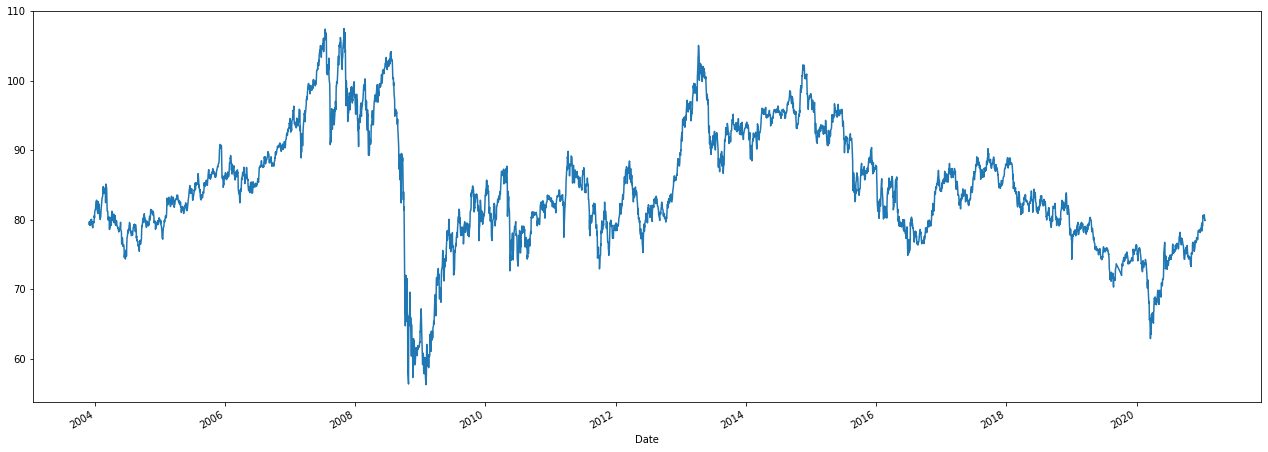

In [141]:
ativo['Close'].plot(figsize=(22,8))

In [142]:
resultado = []
for i in range(0, len(ativo)):
  if ativo['Close'][i] > ativo['Open'][i]:
    resultado.append(1)
  else:
    resultado.append(0)

In [143]:
resultado.pop(0)
resultado.append('Espera')
ativo['Resultado'] = resultado

In [144]:
ativo = ativo.dropna()
#ativo['MM10'] = ativo['Close'] - ativo['MM10']
#ativo['MM20'] = ativo['Close'] - ativo['MM20']
#ativo['MM100'] = ativo['Close'] - ativo['MM100']
#ativo['MM200'] = ativo['Close'] - ativo['MM200']
#ativo['Close'] = ativo['Close'] / ativo['Open']
#ativo['Low'] = ativo['Low'] / ativo['Open']
#ativo['High'] = ativo['High'] / ativo['Open']
#ativo['Open'] = ativo['Open'] / ativo['Open']
#ativo

In [145]:
previsores = ativo.iloc[:len(ativo)-1,0:8]
classe = ativo.iloc[:len(ativo)-1,8]
classe = classe.astype('int')

In [146]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#previsores = scaler.fit_transform(previsores)

In [147]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [148]:
from sklearn.svm import SVC
classificador = SVC(kernel='poly', random_state=1)
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [149]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [150]:
print(precisao)
print(matriz)

0.5525902668759811
[[139 156]
 [129 213]]


In [151]:
# Conclusão: 55%
#poly e rbf

In [152]:
teste1 = classificador.predict(mais_recente)

In [153]:
teste1

array([1])